In [50]:
from neuron import Build_Structure, Neuron
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
class Network:
    
    def __init__(self):
        self.structure = Build_Structure([3], 3)
        
    def cycle(self, inputs:list) -> float:
        
        def process_layer(layer:list, inputs:list):
            output=[]
            for weight in layer:
                # Pythonic way
                cache=0
                for value in inputs:
                    cache+=weight*value
                output.append(cache)
            return output
        
        output = inputs
        for layer in self.structure:
            output = process_layer(layer, output)
        return sum(output)
    
    def backcycle(self, output:float, expectation:float, lr:float=0.1):
        neo_struct = []
        layer_iota_s = []
        for layer in self.structure:
            iota_s = sum(abs(value) for value in layer)
            layer_iota_s.append(iota_s)
        sigma_s = sum(layer_iota_s) + 1e-10
        
        if abs(expectation) < 1e-10:
            Error = output - expectation  
        else:
            Error = (output - expectation) / expectation
        Error = max(min(Error, 1e10), -1e10)
        
        Adjustor = -Error / (1 + abs(Error))
        
        increm = 0
        for layer in self.structure:
            up_layer = []
            lay_scale = 1 - (layer_iota_s[increm] / sigma_s)
            for weight in layer:
                up_layer.append(weight + Adjustor * lay_scale * lr)
            self.structure[increm] = up_layer
            increm += 1
        pass
    
    def train(self, inputs:list, expectation:float, epochs:int=None, threshold:int=None, lr:float=0.1):
        percentages = []
        if epochs is not None:
            for _ in range(epochs):
                output = self.cycle(inputs)
                try:
                    percentages.append((output - expectation) / expectation)
                except ZeroDivisionError:
                    percentages.append((output - expectation) / (expectation + 1e-10))
                self.backcycle(output, expectation, lr)
            return percentages
        elif threshold is not None:
            while True:
                output = self.cycle(inputs)
                percentages.append((output - expectation) / expectation)
                if abs(output - expectation) < threshold:
                    break
                self.backcycle(output, expectation, lr)
            return percentages


In [67]:
Model = Network()

# Training data using a loop for x+2 pattern
train_inputs = range(1, 100)  # 1, 2, 3, 4, 5
for x in train_inputs:
    Model.train([x], x+2, epochs=100, lr=0.001)

# Plotting
x_vals = list(range(1, 20))
y_vals = [Model.cycle([x]) for x in x_vals]
# Calculate linear regression
m, b = np.polyfit(x_vals, y_vals, 1)
regression_line = [m*x + b for x in x_vals]


ValueError: shapes (3,3,1) and (3,3,3) not aligned: 1 (dim 2) != 3 (dim 1)

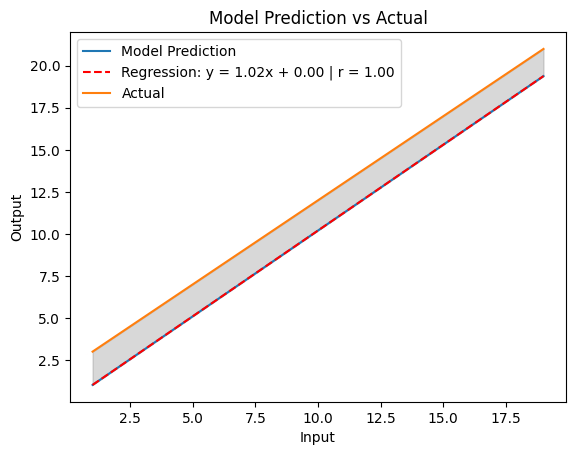

In [ ]:
# Plot model predictions and regression line
plt.plot(x_vals, y_vals, label='Model Prediction')
plt.plot(x_vals, regression_line, 'r--', label=f'Regression: y = {m:.2f}x + {b:.2f} | r = {np.corrcoef(x_vals, y_vals)[0, 1]:.2f}')
plt.plot(x_vals, [x+2 for x in x_vals], label='Actual')
plt.fill_between(x_vals, y_vals, [x+2 for x in x_vals], alpha=0.3, color='gray')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Model Prediction vs Actual')
plt.legend()
plt.show()